In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder

## Import Data

In [2]:
carData = pd.read_csv('SG_usedcar.csv')
carData = carData.drop(['Reg_date','Dep','Road Tax','COE','Curb Weight','Manufactured','Transmission','OMV','ARF','Power','Unnamed: 18'],axis=1)

In [3]:
carData.head()

,Brand,Type,Coe_left,Mileage,Dereg Value,Engine Cap,No. of Owners,Price
0,BMW 5 Series 520i Highline,Luxury Sedan,1yr 11mths 21days COE left),N.A,38133,1997,1,54000
1,Honda Vezel 1.5A X Honda Sensing,SUV,4yrs 4mths 7days COE left),50000,31237,1496,2,49800
2,MINI One 1.6A (New 10-yr COE),Hatchback,10yrs COE left),110000,N.A,1598,3,62800
3,Hyundai Avante 1.6A (COE till 02/2029),Mid-Sized Sedan,7yrs 8mths 5days COE left),N.A,N.A,1591,3,N.A
4,Suzuki Swift Sport 1.6M (COE till 12/2022),Hatchback,1yr 6mths 21days COE left),203000,6656,1586,2,12800


## Change N.A to nan

In [4]:
carData = carData.replace('N.A',np.nan)
carData = carData.replace('N.A.',np.nan)
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4411 non-null   object
 1   Type           4411 non-null   object
 2   Coe_left       4389 non-null   object
 3   Mileage        2851 non-null   object
 4   Dereg Value    3446 non-null   object
 5   Engine Cap     4408 non-null   object
 6   No. of Owners  4339 non-null   object
 7   Price          3676 non-null   object
dtypes: object(8)
memory usage: 275.8+ KB


In [5]:
# get the number of missing data points per column
missing_values_count = carData.isnull().sum()
missing_values_count

Brand               0
Type                0
Coe_left           22
Mileage          1560
Dereg Value       965
Engine Cap          3
No. of Owners      72
Price             735
dtype: int64

## Removing missing values

In [6]:
carData.dropna(subset=['Brand','Type','Coe_left','Mileage','Dereg Value','Engine Cap','No. of Owners','Price'], inplace=True)
carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2631 entries, 1 to 4409
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          2631 non-null   object
 1   Type           2631 non-null   object
 2   Coe_left       2631 non-null   object
 3   Mileage        2631 non-null   object
 4   Dereg Value    2631 non-null   object
 5   Engine Cap     2631 non-null   object
 6   No. of Owners  2631 non-null   object
 7   Price          2631 non-null   object
dtypes: object(8)
memory usage: 185.0+ KB


In [7]:
carData.fillna(0, inplace=True)
carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2631 entries, 1 to 4409
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          2631 non-null   object
 1   Type           2631 non-null   object
 2   Coe_left       2631 non-null   object
 3   Mileage        2631 non-null   object
 4   Dereg Value    2631 non-null   object
 5   Engine Cap     2631 non-null   object
 6   No. of Owners  2631 non-null   object
 7   Price          2631 non-null   object
dtypes: object(8)
memory usage: 185.0+ KB


In [9]:
for i,v in enumerate(carData.Brand):
    wordstr = v.split()
    carData['Brand'].loc[i] = str(wordstr[0]) 

In [10]:
# Function to extract main brand
def extract_main_brand(brand):
    if isinstance(brand, str):
        return brand.split()[0]
    else:
        return np.nan

# Extract main brands from the 'Brand' column
carData['Brand'] = carData['Brand'].apply(extract_main_brand)

# Display the modified DataFrame
carData.head()

,Brand,Type,Coe_left,Mileage,Dereg Value,Engine Cap,No. of Owners,Price
1,Suzuki,SUV,4yrs 4mths 7days COE left),50000,31237,1496,2,49800
4,Kia,Hatchback,1yr 6mths 21days COE left),203000,6656,1586,2,12800
5,BMW,Sports Car,6yrs 1mth 12days COE left),21000,106829,1988,1,259988
13,Honda,Mid-Sized Sedan,3yrs 5mths 7days COE left),35000,31339,1591,1,44800
15,BMW,Mid-Sized Sedan,8yrs 27days COE left),21200,38416,1591,1,85800


In [11]:
carData['Brand'].value_counts()

Brand
Mercedes-Benz    405
Toyota           367
Honda            360
BMW              270
Audi             127
Nissan           127
Mazda            119
Mitsubishi       118
Volkswagen       114
Hyundai           91
Kia               77
Subaru            59
Porsche           52
Lexus             45
Volvo             42
MINI              40
Suzuki            28
Chevrolet         16
Land              15
Peugeot           14
Bentley           13
Opel              13
SEAT              11
Ford              10
Skoda             10
Infiniti           8
Ferrari            8
Hino               8
Citroen            8
McLaren            8
Maserati           7
Renault            6
Lamborghini        6
Fiat               5
Isuzu              5
Proton             3
Jaguar             3
Perodua            2
Alfa               2
Cadillac           2
Hummer             2
Jeep               2
Maxus              1
Rolls-Royce        1
Daihatsu           1
Name: count, dtype: int64

In [12]:
# Function to convert COE left to months
def coe_to_months(coe):
    if isinstance(coe, str):
        coe_parts = coe.split()
        total_months = 0
        for part in coe_parts:
            if 'yr' in part or 'yrs' in part:
                total_months += int(part.strip('yrs').strip('yr')) * 12
            elif 'mth' in part or 'mths' in part:
                total_months += int(part.strip('mths').strip('mth'))
        return total_months
    else:
        return np.nan

# Convert 'Coe_left' to months
carData['Coe_left'] = carData['Coe_left'].apply(coe_to_months)

# Display the modified DataFrame
carData.head()

,Brand,Type,Coe_left,Mileage,Dereg Value,Engine Cap,No. of Owners,Price
1,Suzuki,SUV,52,50000,31237,1496,2,49800
4,Kia,Hatchback,18,203000,6656,1586,2,12800
5,BMW,Sports Car,73,21000,106829,1988,1,259988
13,Honda,Mid-Sized Sedan,41,35000,31339,1591,1,44800
15,BMW,Mid-Sized Sedan,96,21200,38416,1591,1,85800


In [13]:
carData.columns

Index(['Brand', 'Type', 'Coe_left', 'Mileage', 'Dereg Value', 'Engine Cap',
       'No. of Owners', 'Price'],
      dtype='object')

In [14]:
# create a list of fields to be converted to int
convert_dict = {'Mileage': 'int64','No. of Owners': 'int64','Price': 'int64',
                'Dereg Value':'int64','Engine Cap':'int64','Type':'category'}

In [15]:
carData = carData.astype(convert_dict)

In [16]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2631 entries, 1 to 4409
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Brand          2631 non-null   object  
 1   Type           2631 non-null   category
 2   Coe_left       2631 non-null   int64   
 3   Mileage        2631 non-null   int64   
 4   Dereg Value    2631 non-null   int64   
 5   Engine Cap     2631 non-null   int64   
 6   No. of Owners  2631 non-null   int64   
 7   Price          2631 non-null   int64   
dtypes: category(1), int64(6), object(1)
memory usage: 231.9+ KB


In [18]:
carDF=pd.DataFrame(carData[['Brand','Type','Coe_left']])
carDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2631 entries, 1 to 4409
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Brand     2631 non-null   object  
 1   Type      2631 non-null   category
 2   Coe_left  2631 non-null   int64   
dtypes: category(1), int64(1), object(1)
memory usage: 129.1+ KB


In [19]:
carDF.describe()

,Coe_left
count,2631.000000
mean,71.064614
std,28.130853
min,0.000000
25%,53.000000
50%,72.000000
75%,94.000000
max,119.000000


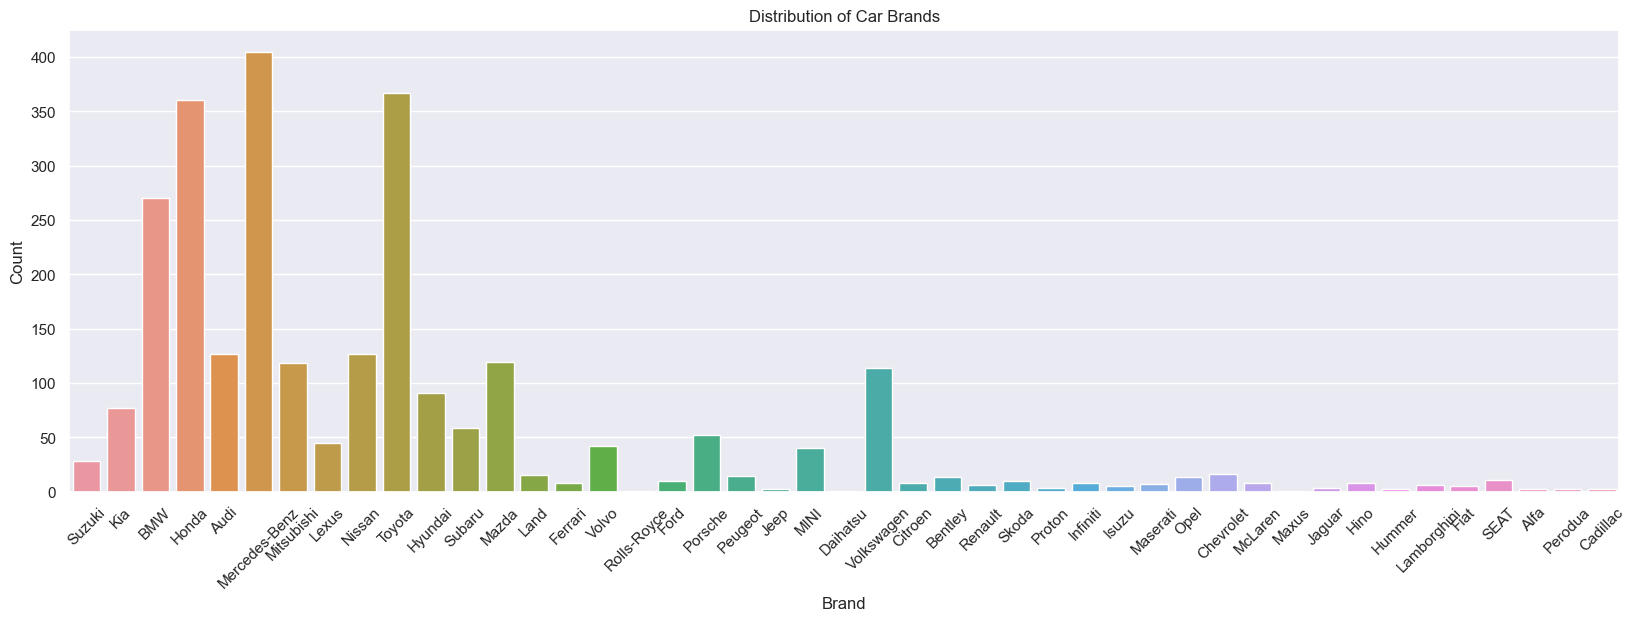

In [20]:
plt.figure(figsize=(20, 6))
sb.countplot(x='Brand', data=carDF)
plt.title('Distribution of Car Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

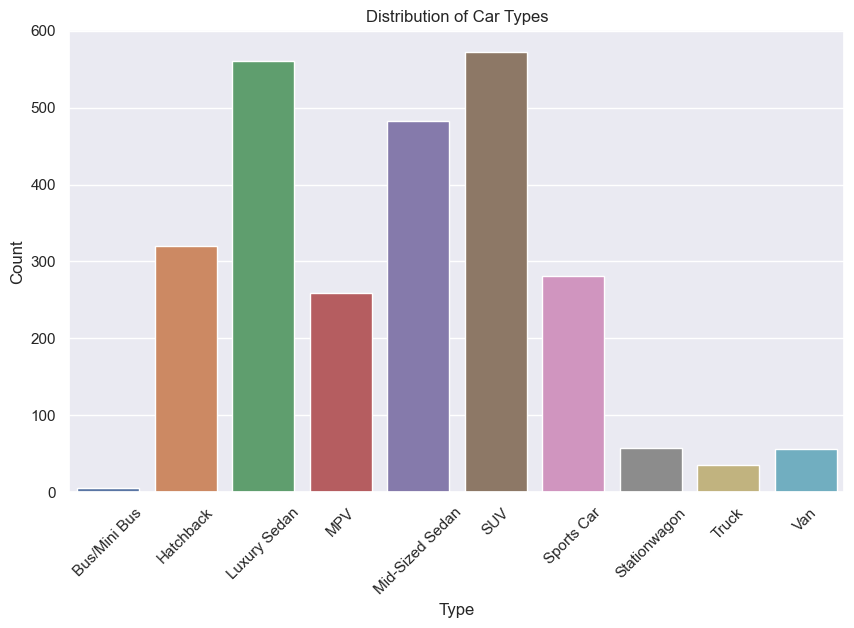

In [21]:
plt.figure(figsize=(10, 6))
sb.countplot(x='Type', data=carDF)
plt.title('Distribution of Car Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

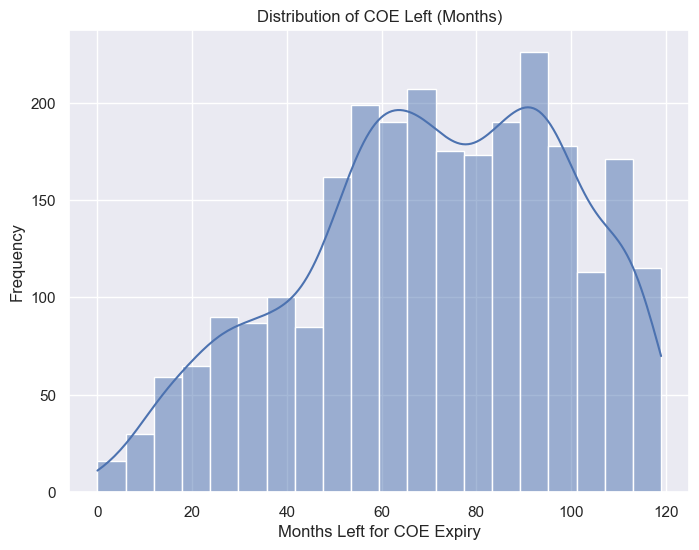

In [22]:
plt.figure(figsize=(8, 6))
sb.histplot(carDF['Coe_left'], bins=20, kde=True)
plt.title('Distribution of COE Left (Months)')
plt.xlabel('Months Left for COE Expiry')
plt.ylabel('Frequency')
plt.show()


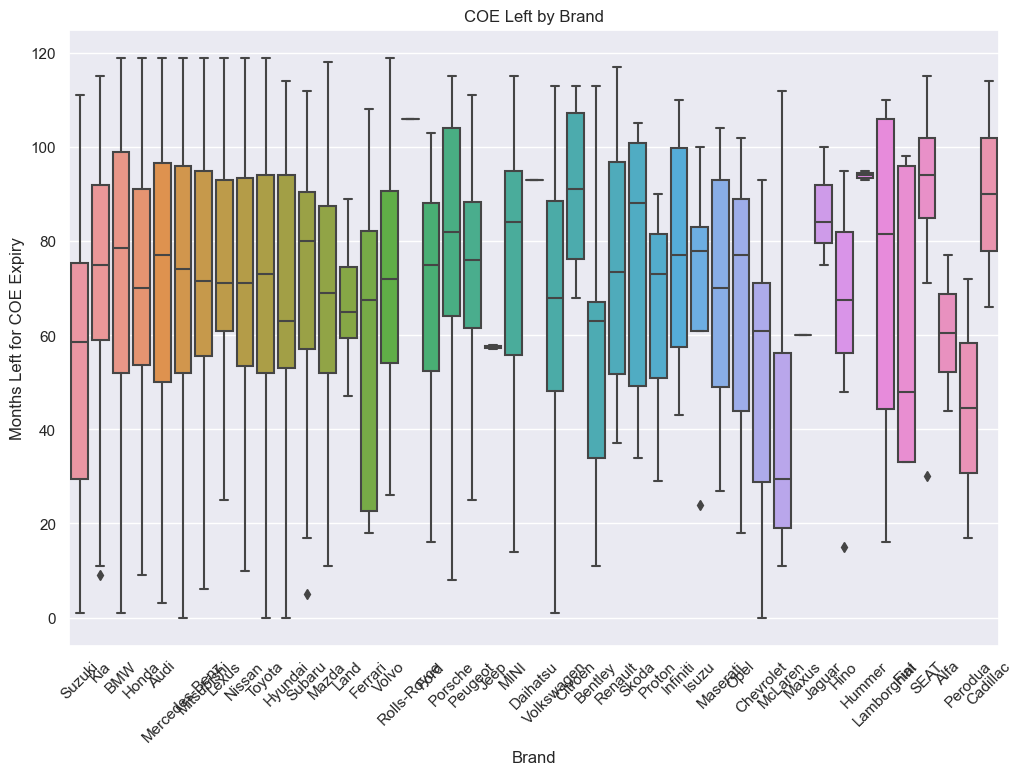

In [24]:
plt.figure(figsize=(12, 8))
sb.boxplot(x='Brand', y='Coe_left', data=carDF)
plt.title('COE Left by Brand')
plt.xlabel('Brand')
plt.ylabel('Months Left for COE Expiry')
plt.xticks(rotation=45)
plt.show()


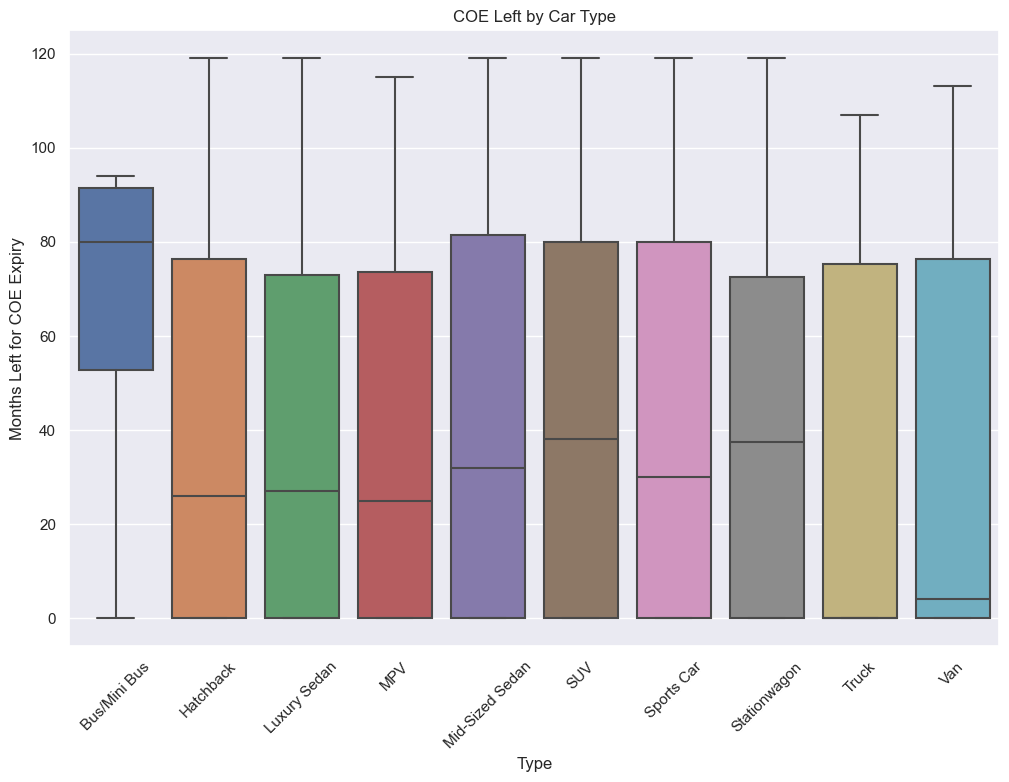

In [169]:
plt.figure(figsize=(12, 8))
sb.boxplot(x='Type', y='Coe_left_mths', data=carDF)
plt.title('COE Left by Car Type')
plt.xlabel('Type')
plt.ylabel('Months Left for COE Expiry')
plt.xticks(rotation=45)
plt.show()


In [25]:
X_brand = carData[['Brand']]  # Predictor variable
y_brand = carData['Price']       # Target variable

X_type = carData[['Type']]      # Predictor variable
y_type = carData['Price']         # Target variable

X_coe = carData[['Coe_left']]      # Predictor variable
y_coe = carData['Price']         # Target variable


In [26]:
encoder = OneHotEncoder()
X_brand_encoded = encoder.fit_transform(X_brand)
X_type_encoded = encoder.fit_transform(X_type)

In [27]:
X_brand_train, X_brand_test, y_brand_train, y_brand_test = train_test_split(X_brand_encoded, y_brand, test_size=0.25, random_state=0)
X_type_train, X_type_test, y_type_train, y_type_test = train_test_split(X_type_encoded, y_type, test_size=0.25, random_state=0)
X_coe_train, X_coe_test, y_coe_train, y_coe_test = train_test_split(X_coe, y_coe, test_size=0.25, random_state=0)


In [28]:
# Create linear regression models
reg_brand = LinearRegression()
reg_type = LinearRegression()
reg_coe = LinearRegression()

# Fit the models
reg_brand.fit(X_brand_train, y_brand_train)
reg_type.fit(X_type_train, y_type_train)
reg_coe.fit(X_coe_train, y_coe_train)

# Predictions
y_brand_pred = reg_brand.predict(X_brand_test)
y_type_pred = reg_type.predict(X_type_test)
y_coe_pred = reg_coe.predict(X_coe_test)



In [29]:
# Calculate MSE and R^2 for each predictor
mse_brand = mean_squared_error(y_brand_test, y_brand_pred)
r2_brand = r2_score(y_brand_test, y_brand_pred)

mse_type = mean_squared_error(y_type_test, y_type_pred)
r2_type = r2_score(y_type_test, y_type_pred)

mse_coe = mean_squared_error(y_coe_test, y_coe_pred)
r2_coe = r2_score(y_coe_test, y_coe_pred)

print("Brand Predictor:")
print("MSE:", mse_brand)
print("R^2:", r2_brand)

print("\nType Predictor:")
print("MSE:", mse_type)
print("R^2:", r2_type)

print("\nCOE Left Predictor:")
print("MSE:", mse_coe)
print("R^2:", r2_coe)

Brand Predictor:
MSE: 11082299016.89338
R^2: 0.08184519175617677

Type Predictor:
MSE: 10231988484.586412
R^2: 0.15229237086115455

COE Left Predictor:
MSE: 11067720916.373367
R^2: 0.0830529694083686
